# Data Wrangling Project - Tweets

This project was developed to analyse tweets from the @WeRateDogs page from Twitter. It aims to go through the role process of data wrangling: gather, acess and clean data.

The project asseses 8 quality issues in the dataset and 2 tidiness issues, which will be corrected. After proper cleaning, the cleanned dataframe is stored in a csv file named `twitter_archive_master.csv`.

An analysis of the dataset to get 3 insights and 2 visualizations is also performed.

In [1]:
# Importing libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tweepy 
import requests
import re
import json
import datetime as dt
%matplotlib inline

# Gather

First, data will be gathered from 3 different sources: a csv file, a tsv file and through JSON data (Twitter's API).

In [2]:
# Checking dataset names in directory
! ls

act_report.ipynb
image-predictions.tsv
twitter-archive-enhanced.csv
twitter_archive_master.csv
wrangle_act.ipynb
wrangle_report.ipynb


In [3]:
# Reading csv  file in a DataFrame
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Verifying datasets were correctly readed
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# reading tsv file form url
image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(image_url)

with open (image_url.split('/')[-1], mode='wb') as file:
    file.write(r.content)
    
df_images = pd.read_csv('image-predictions.tsv', sep='\t')
df_images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [6]:
# Querying tweets from WeRateDogs account

# Defining keys
consumer_key = 'YOUR_CONSUMER_KEY'
consumer_secret = 'YOUR_CONSUMER_SECRET'
access_token = 'YOUR_ACCESS_TOKENaccess_secret = 'YOUR_ACCESS_SECRET'

In [7]:
# Setup Authentication and Tweepy API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
# logs tweets that fail to pull from API
error_list = []

# Searching tweets through tweet_id content and writing tweets to text file

with open('tweet_json.txt', 'w', encoding='utf8') as f:
    for tweet_id in df_tweets.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("{0}: Successful".format(tweet_id))
            json.dump(tweet, f)
            f.write('\n')
        except Exception as e:
            print("{0}: {1}".format(tweet_id, e))
            error_list.append(tweet_id)

892420643555336193: Successful
892177421306343426: Successful
891815181378084864: Successful
891689557279858688: Successful
891327558926688256: Successful
891087950875897856: Successful
890971913173991426: Successful
890729181411237888: Successful
890609185150312448: Successful
890240255349198849: Successful
890006608113172480: Successful
889880896479866881: Successful
889665388333682689: Successful
889638837579907072: Successful
889531135344209921: Successful
889278841981685760: Successful
888917238123831296: Successful
888804989199671297: Successful
888554962724278272: Successful
888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136: Successful
887705289381826560: Successful
887517139158093824: Successful
887473957103951883: Successful
887343217045368832: Successful
887101392804085760: Successful
886983233522544640: Successful
886736880519319552: Successful
886680336477933568: Successful
886366144734445568: Successful
886267009285017600: S

845306882940190720: Successful
845098359547420673: Successful
844979544864018432: Successful
844973813909606400: Successful
844704788403113984: [{'code': 144, 'message': 'No status found with that ID.'}]
844580511645339650: Successful
844223788422217728: Successful
843981021012017153: Successful
843856843873095681: Successful
843604394117681152: Successful
843235543001513987: Successful
842892208864923648: [{'code': 144, 'message': 'No status found with that ID.'}]
842846295480000512: Successful
842765311967449089: Successful
842535590457499648: Successful
842163532590374912: Successful
842115215311396866: Successful
841833993020538882: Successful
841680585030541313: Successful
841439858740625411: Successful
841320156043304961: Successful
841314665196081154: Successful
841077006473256960: Successful
840761248237133825: Successful
840728873075638272: Successful
840698636975636481: Successful
840696689258311684: Successful
840632337062862849: Successful
840370681858686976: Successful
840

813051746834595840: Successful
812781120811126785: Successful
812747805718642688: [{'code': 144, 'message': 'No status found with that ID.'}]
812709060537683968: Successful
812503143955202048: Successful
812466873996607488: Successful
812372279581671427: Successful
811985624773361665: Successful
811744202451197953: Successful
811647686436880384: Successful
811627233043480576: Successful
811386762094317568: Successful
810984652412424192: Successful
810896069567610880: Successful
810657578271330305: Successful
810284430598270976: Successful
810254108431155201: Successful
809920764300447744: Successful
809808892968534016: Successful
809448704142938112: Successful
809220051211603969: Successful
809084759137812480: Successful
808838249661788160: Successful
808733504066486276: Successful
808501579447930884: Successful
808344865868283904: Successful
808134635716833280: Successful
808106460588765185: Successful
808001312164028416: Successful
807621403335917568: Successful
807106840509214720: S

777953400541634568: Successful
777885040357281792: Successful
777684233540206592: Successful
777641927919427584: Successful
777621514455814149: Successful
777189768882946048: Successful
776819012571455488: Successful
776813020089548800: Successful
776477788987613185: Successful
776249906839351296: Successful
776218204058357768: Successful
776201521193218049: Successful
776113305656188928: Successful
776088319444877312: Successful
775898661951791106: Successful
775842724423557120: Successful
775733305207554048: Successful
775729183532220416: Successful
775364825476165632: Successful
775350846108426240: Successful
775096608509886464: [{'code': 144, 'message': 'No status found with that ID.'}]
775085132600442880: Successful
774757898236878852: Successful
774639387460112384: Successful
774314403806253056: Successful
773985732834758656: Successful
773922284943896577: Successful
773704687002451968: Successful
773670353721753600: Successful
773547596996571136: Successful
773336787167145985: S

Rate limit reached. Sleeping for: 24


758740312047005698: Successful
758474966123810816: Successful
758467244762497024: Successful
758405701903519748: Successful
758355060040593408: Successful
758099635764359168: Successful
758041019896193024: Successful
757741869644341248: Successful
757729163776290825: Successful
757725642876129280: Successful
757611664640446465: Successful
757597904299253760: Successful
757596066325864448: Successful
757400162377592832: Successful
757393109802180609: Successful
757354760399941633: Successful
756998049151549440: Successful
756939218950160384: Successful
756651752796094464: Successful
756526248105566208: Successful
756303284449767430: Successful
756288534030475264: Successful
756275833623502848: Successful
755955933503782912: Successful
755206590534418437: Successful
755110668769038337: Successful
754874841593970688: Successful
754856583969079297: Successful
754747087846248448: Successful
754482103782404096: Successful
754449512966619136: Successful
754120377874386944: Successful
75401181

723673163800948736: Successful
723179728551723008: Successful
722974582966214656: Successful
722613351520608256: Successful
721503162398597120: Successful
721001180231503872: Successful
720785406564900865: Successful
720775346191278080: Successful
720415127506415616: Successful
720389942216527872: Successful
720340705894408192: Successful
720059472081784833: Successful
720043174954147842: Successful
719991154352222208: Successful
719704490224398336: Successful
719551379208073216: Successful
719367763014393856: Successful
719339463458033665: Successful
719332531645071360: Successful
718971898235854848: Successful
718939241951195136: Successful
718631497683582976: Successful
718613305783398402: Successful
718540630683709445: Successful
718460005985447936: Successful
718454725339934721: Successful
718246886998687744: Successful
718234618122661888: Successful
717841801130979328: Successful
717790033953034240: Successful
717537687239008257: Successful
717428917016076293: Successful
71742180

697616773278015490: Successful
697596423848730625: Successful
697575480820686848: Successful
697516214579523584: Successful
697482927769255936: Successful
697463031882764288: Successful
697270446429966336: Successful
697259378236399616: Successful
697255105972801536: Successful
697242256848379904: Successful
696900204696625153: Successful
696894894812565505: Successful
696886256886657024: Successful
696877980375769088: Successful
696754882863349760: Successful
696744641916489729: Successful
696713835009417216: Successful
696518437233913856: Successful
696490539101908992: Successful
696488710901260288: Successful
696405997980676096: Successful
696100768806522880: Successful
695816827381944320: Successful
695794761660297217: Successful
695767669421768709: Successful
695629776980148225: Successful
695446424020918272: Successful
695409464418041856: Successful
695314793360662529: Successful
695095422348574720: Successful
695074328191332352: Successful
695064344191721472: Successful
69505105

681297372102656000: Successful
681281657291280384: Successful
681261549936340994: Successful
681242418453299201: Successful
681231109724700672: Successful
681193455364796417: Successful
680970795137544192: Successful
680959110691590145: Successful
680940246314430465: Successful
680934982542561280: Successful
680913438424612864: Successful
680889648562991104: Successful
680836378243002368: Successful
680805554198020098: Successful
680801747103793152: Successful
680798457301471234: Successful
680609293079592961: Successful
680583894916304897: Successful
680497766108381184: Successful
680494726643068929: Successful
680473011644985345: Successful
680440374763077632: Successful
680221482581123072: Successful
680206703334408192: Successful
680191257256136705: Successful
680176173301628928: Successful
680161097740095489: Successful
680145970311643136: Successful
680130881361686529: Successful
680115823365742593: Successful
680100725817409536: Successful
680085611152338944: Successful
68007054

Rate limit reached. Sleeping for: 25


676975532580409345: Successful
676957860086095872: Successful
676949632774234114: Successful
676948236477857792: Successful
676946864479084545: Successful
676942428000112642: Successful
676936541936185344: Successful
676916996760600576: Successful
676897532954456065: Successful
676864501615042560: Successful
676821958043033607: Successful
676819651066732545: Successful
676811746707918848: Successful
676776431406465024: Successful
676617503762681856: Successful
676613908052996102: Successful
676606785097199616: Successful
676603393314578432: Successful
676593408224403456: Successful
676590572941893632: Successful
676588346097852417: Successful
676582956622721024: Successful
676575501977128964: Successful
676533798876651520: Successful
676496375194980353: Successful
676470639084101634: Successful
676440007570247681: Successful
676430933382295552: Successful
676263575653122048: Successful
676237365392908289: Successful
676219687039057920: Successful
676215927814406144: Successful
67619183

671151324042559489: Successful
671147085991960577: Successful
671141549288370177: Successful
671138694582165504: Successful
671134062904504320: Successful
671122204919246848: Successful
671115716440031232: Successful
671109016219725825: Successful
670995969505435648: Successful
670842764863651840: Successful
670840546554966016: Successful
670838202509447168: Successful
670833812859932673: Successful
670832455012716544: Successful
670826280409919488: Successful
670823764196741120: Successful
670822709593571328: Successful
670815497391357952: Successful
670811965569282048: Successful
670807719151067136: Successful
670804601705242624: Successful
670803562457407488: Successful
670797304698376195: Successful
670792680469889025: Successful
670789397210615808: Successful
670786190031921152: Successful
670783437142401025: Successful
670782429121134593: Successful
670780561024270336: Successful
670778058496974848: Successful
670764103623966721: Successful
670755717859713024: Successful
67073341

666362758909284353: Successful
666353288456101888: Successful
666345417576210432: Successful
666337882303524864: Successful
666293911632134144: Successful
666287406224695296: Successful
666273097616637952: Successful
666268910803644416: Successful
666104133288665088: Successful
666102155909144576: Successful
666099513787052032: Successful
666094000022159362: Successful
666082916733198337: Successful
666073100786774016: Successful
666071193221509120: Successful
666063827256086533: Successful
666058600524156928: Successful
666057090499244032: Successful
666055525042405380: Successful
666051853826850816: Successful
666050758794694657: Successful
666049248165822465: Successful
666044226329800704: Successful
666033412701032449: Successful
666029285002620928: Successful
666020888022790149: Successful


In [9]:
# Printing number of successful and fail tweets
print("Successful: {0} tweets".format(len(df_tweets.tweet_id) - len(error_list)))
print("Failed: {0}".format(len(error_list)))

Successful: 2331 tweets
Failed: 25


Most of the tweets that can't be found probably were deleted.

Now that the tweets were extracted, a new dataframe will be created through a list of dictionaries. The dataframe will be created with 5 columns: 'tweet_id', 'favorites', 'retweets', 'retweeted' and 'full_text'

In [10]:
new_df = []

with open('tweet_json.txt', 'r', encoding='utf8') as f:
    for line in f:
        new_line = json.loads(line)
        new_df.append({'tweet_id': new_line['id'],
                        'favorites': new_line['favorite_count'],
                        'retweets': new_line['retweet_count'],
                        'retweeted': new_line['retweeted'],
                        'full_text': new_line['full_text'][:]})
        
tweets_data = pd.DataFrame(new_df)

In [11]:
tweets_data.head(3)

,tweet_id,favorites,retweets,retweeted,full_text
0,892420643555336193,35884,7602,False,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,30949,5631,False,This is Tilly. She's just checking pup on you....
2,891815181378084864,23294,3726,False,This is Archie. He is a rare Norwegian Pouncin...


# Assess

In [12]:
# Checking general info from the dataset

df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

It is possible to verify that there is some missing data from 'expanded_urls' column, which is a quality issue.

In [13]:
# Descriptive statistics from df

df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
# Checking name of columns from df_tweets

list(df_tweets)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [15]:
# Checking different unique value from 'name' column

df_tweets.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Fwed         1
Adele        1
Leonard      1
Blanket      1
Arlen        1
Name: name, Length: 957, dtype: int64

In [16]:
# Checking duplicated tweet_id values 

df_tweets[df_tweets.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
# Checking min and max values of rating numerators

print(df_tweets['rating_numerator'].min())
print(df_tweets['rating_numerator'].max())

0
1776


In [18]:
# Checking data with '1776' in nominator

df_tweets.loc[df_tweets['rating_numerator'] == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [19]:
# Checking if denominator has only the value '10'

df_tweets['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
# Checking retweets content

# Filling NaN values with 0 and transforming column to int type
df_tweets.retweeted_status_id = df_tweets.retweeted_status_id.fillna(0).astype(int)
df_tweets.loc[df_tweets['retweeted_status_id'] != 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,-2147483648,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,-2147483648,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,-2147483648,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,-2147483648,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,-2147483648,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,-2147483648,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,-2147483648,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,-2147483648,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,-2147483648,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


Analyzing the dataframe above, it can be seen that retweets have and "RT" on the text content.

In [21]:
# Checking name of columns from df_image
list(df_images)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Quality

* Timestamp column has "+0000" after time
* Timestamp column is not in correct type
* Exclude retweets
* Exclude dogs with name "a"
* Exclude dogs with name "an"
* Exclude dogs with name "the"
* Set all rating denominators to "10"
* Exclude rating numerator of "1776"

### Tidiness

* The 3 dataframes could be merged in the same dataframe.
* Dogs breed can be unified in one column

# Clean

In [22]:
# Making a copy of the dataframe to clean it (best practice)
tweets_clean = df_tweets.copy()
images_clean = df_images.copy()
api_clean = tweets_data.copy()

In [23]:
tweets_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1317,706593038911545345,NaN,NaN,2016-03-06 21:31:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sneak peek of me on spring break. 10/...,0,NaN,NaN,https://twitter.com/dog_rates/status/706593038...,10,10,None,None,None,None,None
887,759923798737051648,NaN,NaN,2016-08-01 01:28:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs... this is a Taiwanese Guide...,0,NaN,NaN,https://twitter.com/dog_rates/status/759923798...,10,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,0,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None


## I - Quality Issues

### Define

Exclude "+0000" from timestamp column by string slicing.

### Code

In [24]:
tweets_clean['timestamp'] = tweets_clean.timestamp.str[:-5]

### Test

In [25]:
tweets_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,0,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Define

Transform timestamp column in correct type through `to_datetime` function.

### Code

In [26]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])

### Test

In [27]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         2356 non-null   int32         
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Define

Exclude retweets from dataframe through `drop` function. As it was observed before, retweets usually have an 'RT' on its text. After deleting retweets 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns

### Code

In [28]:
tweets_clean.drop((tweets_clean[tweets_clean['retweeted_status_id'] != 0].index), inplace=True)

# Additionally to the code above, some retweets columns and reply columns that won't be used on the project will be dropped
tweets_clean = tweets_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

### Test

In [29]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Define

Exclude dogs with name "a" through `drop` function.

### Code

In [30]:
tweets_clean.drop((tweets_clean[tweets_clean['name'] == 'a'].index), inplace=True)

### Test

In [31]:
#tweets_clean.loc[tweets_clean['name'] == 'a']
tweets_clean['name'].value_counts()

None          680
Charlie        11
Lucy           11
Cooper         10
Oliver         10
             ... 
Sora            1
incredibly      1
Bayley          1
Dido            1
Arlen           1
Name: name, Length: 955, dtype: int64

### Define

Exclude dogs with name "an" through `drop` function.

### Code

In [32]:
tweets_clean.drop((tweets_clean[tweets_clean['name'] == 'an'].index), inplace=True)

### Test

In [33]:
#tweets_clean.loc[tweets_clean['name'] == 'an']
tweets_clean['name'].value_counts()

None          680
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Sora            1
incredibly      1
Bayley          1
Dido            1
Arlen           1
Name: name, Length: 954, dtype: int64

### Define

Exclude dogs with name "the" through `drop` function.

### Code

In [34]:
tweets_clean.drop((tweets_clean[tweets_clean['name'] == 'the'].index), inplace=True)

### Test

In [35]:
tweets_clean.loc[tweets_clean['name'] == 'the']
#tweets_clean['name'].value_counts()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define

Setting all denominators as a 10 value, by replacing all values by 10.

### Code

In [36]:
tweets_clean['rating_denominator'] = 10

### Test

In [37]:
tweets_clean.rating_denominator.value_counts()

10    2106
Name: rating_denominator, dtype: int64

### Define

Exclude outlier 1776 of rating_denominator column through `drop` function.

### Code

In [38]:
tweets_clean.drop((tweets_clean[tweets_clean['rating_numerator'] == 1776].index), inplace=True)

### Test

In [39]:
tweets_clean[tweets_clean['rating_numerator'] == 1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


After this last code line, it is possible to observe that all quality issues were corrected in the dataframe. 

## II - Tidiness Issues

### Define

Merge the 3 datasets through the `merge`function.

### Code

In [40]:
# Merging datasets
tweets_clean = pd.merge(tweets_clean, api_clean, on = 'tweet_id')
tweets_clean = pd.merge(tweets_clean, images_clean, on = 'tweet_id')

In [41]:
# Setting tweet_id as a string
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)
images_clean.tweet_id = images_clean.tweet_id.astype(str)

### Test

In [42]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorites', 'retweets', 'retweeted', 'full_text',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Define

 The columns 'doggo', 'floofer', 'pupper' and 'puppo' are variables and should form just 1 column. A new stage column will be created.

### Code

In [43]:
tweets_clean['stage'] = np.NaN # Creating NaN column
tweets_clean['stage'] = tweets_clean['stage'].astype('object') # Definying column as object
tweets_clean['stage']

for i, row in tweets_clean.iterrows():

    if row['doggo'] == 'doggo':
        tweets_clean.at[i, 'stage'] = 'doggo'
    elif row['floofer'] == 'floofer':
        tweets_clean.at[i, 'stage'] = 'floofer'
    elif row['pupper'] == 'pupper':
        tweets_clean.at[i, 'stage'] = 'pupper'
    elif row['puppo'] == 'puppo':
        tweets_clean.at[i, 'stage'] = 'puppo'


In [44]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 0 to 1917
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1918 non-null   object        
 1   timestamp           1918 non-null   datetime64[ns]
 2   source              1918 non-null   object        
 3   text                1918 non-null   object        
 4   expanded_urls       1918 non-null   object        
 5   rating_numerator    1918 non-null   int64         
 6   rating_denominator  1918 non-null   int64         
 7   name                1918 non-null   object        
 8   doggo               1918 non-null   object        
 9   floofer             1918 non-null   object        
 10  pupper              1918 non-null   object        
 11  puppo               1918 non-null   object        
 12  favorites           1918 non-null   int64         
 13  retweets            1918 non-null   int64       

In [45]:
tweets_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN


# Analysis and Visualization

In [46]:
# Storing values
tweets_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [47]:
df_clean = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

In [48]:
df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
454,793500921481273345,2016-11-01 17:12:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an extremely mediocre cop...,https://twitter.com/dog_rates/status/793500921...,12,10,Fiona,None,None,...,golden_retriever,0.326122,True,Labrador_retriever,0.219904,True,Chesapeake_Bay_retriever,0.163366,True,NaN
358,813800681631023104,2016-12-27 17:36:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Sky. She's learning how to roll her R'...,https://twitter.com/dog_rates/status/813800681...,12,10,Sky,None,None,...,malamute,0.501159,True,Siberian_husky,0.228792,True,Eskimo_dog,0.200388,True,NaN
833,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,10,this,None,None,...,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,NaN
548,777684233540206592,2016-09-19 01:42:24,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,...,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True,NaN
1082,699323444782047232,2016-02-15 20:04:36,"<a href=""http://twitter.com/download/iphone"" r...","""I'm bathing the children what do you want?"" ...",https://twitter.com/dog_rates/status/699323444...,10,10,None,None,None,...,Labrador_retriever,0.309696,True,doormat,0.303700,False,sliding_door,0.077266,False,NaN


In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1918 non-null   int64  
 1   timestamp           1918 non-null   object 
 2   source              1918 non-null   object 
 3   text                1918 non-null   object 
 4   expanded_urls       1918 non-null   object 
 5   rating_numerator    1918 non-null   int64  
 6   rating_denominator  1918 non-null   int64  
 7   name                1918 non-null   object 
 8   doggo               1918 non-null   object 
 9   floofer             1918 non-null   object 
 10  pupper              1918 non-null   object 
 11  puppo               1918 non-null   object 
 12  favorites           1918 non-null   int64  
 13  retweets            1918 non-null   int64  
 14  retweeted           1918 non-null   bool   
 15  full_text           1918 non-null   object 
 16  jpg_ur

In [50]:
df_clean[['p1_conf', 'p2_conf', 'p3_conf']].mean()

p1_conf    0.592954
p2_conf    0.134081
p3_conf    0.060381
dtype: float64

#### Insight 1

Analyzing the confidence from the algorithms the first 1 have a good chance to guess the breed correctly. As the other 2 algorithms don't achieve confidences of at least 15%, it would be possible to exclude these predictions from the data.   

In [51]:
breed = df_clean[df_clean['p1_dog'] == True]

In [52]:
breed['p1'].value_counts()[0:10]

golden_retriever      137
Labrador_retriever     92
Pembroke               85
Chihuahua              77
pug                    52
chow                   39
Samoyed                37
Pomeranian             36
toy_poodle             33
malamute               28
Name: p1, dtype: int64

#### Insight 2

Using the same algorithm p1 and the correct predictions, it is possible to analyze that the Top 3 common dog breeds are golden_retriever, Labrador_retriever and Pembroke.

#### Visualization 1

With the dog breeds extracted, a horizontal bar chart will be plotted. 

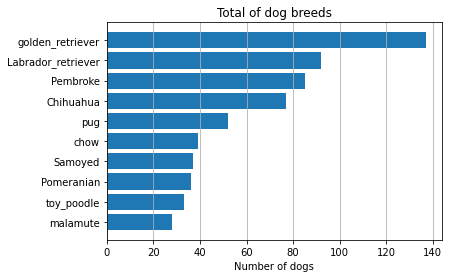

In [53]:
top_10_breeds = breed['p1'].value_counts()[0:10].sort_values()
plt.barh(top_10_breeds.index, top_10_breeds)
plt.xlabel('Number of dogs')
plt.title('Total of dog breeds')
plt.grid(axis='x')

In [54]:
df_clean.groupby('stage')['favorites'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
doggo,73.0,18240.904110,24349.688200,2309.0,7420.0,10815.0,17812.00,154577.0
floofer,7.0,11936.142857,10177.122046,2047.0,4538.0,10106.0,16179.50,29965.0
pupper,197.0,6501.913706,10390.592313,620.0,2180.0,2955.0,7062.00,115456.0
puppo,22.0,20766.090909,28250.315272,2943.0,6329.0,12225.0,17974.75,131854.0


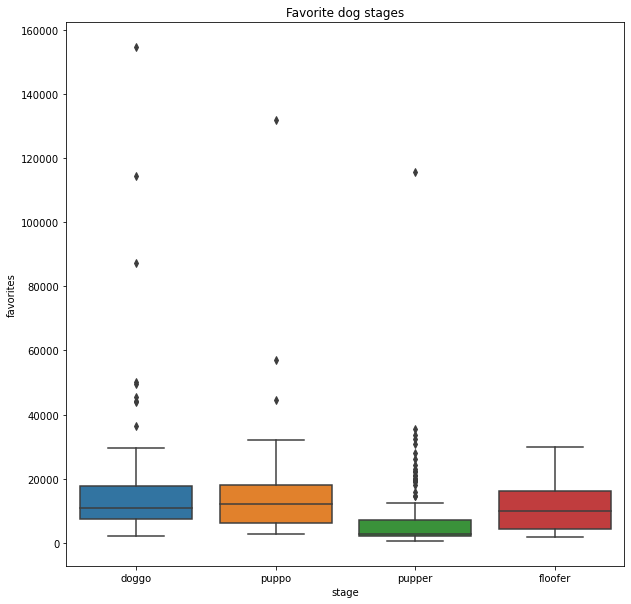

In [55]:
plt.figure(figsize=(10,10))
sb.boxplot(x="stage", y="favorites", data=tweets_clean).set_title('Favorite dog stages');

#### Insight 3 + Visualization 2

Analyzing the data above it is possible to verify that the favorite stage from Twitter's users is puppo and the least favorite is pupper.

# Conclusions

In this project it was possible to pass by the entire data wrangling process: gather data from a csv file (Twitter archive), tsv file (Image predictions) and query a Twitter API for each tweet's JSON data using Python's Tweepy library; assess data to verify 8 quality issues and 2 tidiness issues; and fix (clean) those issues using `drop`, `to_datetime`, `merge` functions, string slicing and replacing values.

Data cleanned was analyzed and it was possible to observe 3 insights:

* The first algorithm (p1) has a better chance to predict the dog breed, comparing to the other ones;
* Top 3 common dog breeds are golden_retriever, Labrador_retriever and Pembroke;
* The favorite development stage of dogs from Twitter's users is puppo and the least favorite is pupper.

Also a horizontal bar chart and boxplot were plotted to view and analyze some of the insights.

Some other quality issues were fixed during the development of the project and many others were ignored.

# References

* [Fill dataframe with for loop](https://stackoverflow.com/questions/28056171/how-to-build-and-fill-pandas-dataframe-from-for-loop/28058264#28058264)
* [Drop rows with certain condition](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/)
* [Horizontal bar chart](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barh.html)
* [Plotting grid lines in python](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html)
* [Seaborn boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)